## testing

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score

In [23]:
def read_b(number):
    return pd.read_csv(f'./data/train/problem-B-C/0{number}.csv')

def read_b_big(number):
    return pd.read_csv(f'./data/train/problem-B-C/{number}.csv')

df_1 = read_b(1)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CLUSTER           351 non-null    int64  
 1   CPU_FREQ          351 non-null    int64  
 2   DDR_FREQ          351 non-null    int64  
 3   INST_RETIRED      351 non-null    float64
 4   CPU_CYCLES        351 non-null    float64
 5   STALL_BACKEND     351 non-null    float64
 6   STALL_FRONTEND    351 non-null    float64
 7   L3D_CACHE_REFILL  351 non-null    float64
 8   L3D_CACHE         351 non-null    float64
 9   MEM_ACCESS        351 non-null    float64
 10  IPC               351 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 30.3 KB


In [24]:
df = read_b(1)
datas = {}
for i in range(2, 38):
    if i>=10:
        df_i = read_b_big(i)
    else:
        df_i = read_b(i)
    df = pd.concat([df, df_i])


    for line in range(len(df_i)):
        cluster = df_i['CLUSTER'][line]
        cpu = df_i['CPU_FREQ'][line]
        ddr = df_i['DDR_FREQ'][line]
        was = datas.get((cluster, cpu, ddr), [])
        was.append(0)
        datas[(cluster, cpu, ddr)] = was

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 12987 entries, 0 to 350
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CLUSTER           12987 non-null  int64  
 1   CPU_FREQ          12987 non-null  int64  
 2   DDR_FREQ          12987 non-null  int64  
 3   INST_RETIRED      12987 non-null  float64
 4   CPU_CYCLES        12987 non-null  float64
 5   STALL_BACKEND     12987 non-null  float64
 6   STALL_FRONTEND    12987 non-null  float64
 7   L3D_CACHE_REFILL  12987 non-null  float64
 8   L3D_CACHE         12987 non-null  float64
 9   MEM_ACCESS        12987 non-null  float64
 10  IPC               12987 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 1.2 MB
None


,CLUSTER,CPU_FREQ,DDR_FREQ,INST_RETIRED,CPU_CYCLES,STALL_BACKEND,STALL_FRONTEND,L3D_CACHE_REFILL,L3D_CACHE,MEM_ACCESS,IPC
0,0,884000,418000000,1899440.0,17136100.0,9286270.0,6568600.0,77644.4,279196.0,847308.0,0.110844
1,0,884000,902000000,2259730.0,17179900.0,9411450.0,6255860.0,91710.9,331175.0,1008030.0,0.131533
2,0,884000,1104000000,2414860.0,17187000.0,9387360.0,6182910.0,98267.9,353858.0,1077230.0,0.140505
3,0,884000,1373000000,2619660.0,17190700.0,9336510.0,6102450.0,105759.0,383019.0,1168600.0,0.152389
4,0,884000,1531000000,2767900.0,17199400.0,9321570.0,6029280.0,111696.0,404173.0,1234730.0,0.160929


In [30]:
def read_test(number):
    return pd.read_csv(f'./data/test/problem-B/B{number}.csv')

df_test_B1 = read_test(1)
print(df_test_B1.info())
print(df_test_B1.head())

datas_test = {}

for line in range(len(df_test_B1)):
        cluster = df_i['CLUSTER'][line]
        cpu = df_i['CPU_FREQ'][line]
        ddr = df_i['DDR_FREQ'][line]
        was = datas_test.get((cluster, cpu, ddr), [])
        was.append(0)
        datas_test[(cluster, cpu, ddr)] = was

print(df.info())
df.head()
datas_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CLUSTER           106 non-null    int64  
 1   CPU_FREQ          106 non-null    int64  
 2   DDR_FREQ          106 non-null    int64  
 3   INST_RETIRED      106 non-null    float64
 4   CPU_CYCLES        106 non-null    float64
 5   STALL_BACKEND     106 non-null    float64
 6   STALL_FRONTEND    106 non-null    float64
 7   L3D_CACHE_REFILL  106 non-null    float64
 8   L3D_CACHE         106 non-null    float64
 9   MEM_ACCESS        106 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 8.4 KB
None
   CLUSTER  CPU_FREQ    DDR_FREQ  INST_RETIRED  CPU_CYCLES  STALL_BACKEND  \
0        0    884000   902000000     7690790.0  17204000.0     10907800.0   
1        0    884000  1531000000     9130120.0  17222100.0     10265800.0   
2        0    884000  2107000000     9625760.

{(0, 884000, 418000000): [0],
 (0, 884000, 902000000): [0],
 (0, 884000, 1104000000): [0],
 (0, 884000, 1373000000): [0],
 (0, 884000, 1531000000): [0],
 (0, 884000, 1795000000): [0],
 (0, 884000, 2107000000): [0],
 (0, 884000, 2405000000): [0],
 (0, 884000, 2746000000): [0],
 (0, 960000, 418000000): [0],
 (0, 960000, 902000000): [0],
 (0, 960000, 1104000000): [0],
 (0, 960000, 1373000000): [0],
 (0, 960000, 1531000000): [0],
 (0, 960000, 1795000000): [0],
 (0, 960000, 2107000000): [0],
 (0, 960000, 2405000000): [0],
 (0, 960000, 2746000000): [0],
 (0, 1037000, 418000000): [0],
 (0, 1037000, 902000000): [0],
 (0, 1037000, 1104000000): [0],
 (0, 1037000, 1373000000): [0],
 (0, 1037000, 1531000000): [0],
 (0, 1037000, 1795000000): [0],
 (0, 1037000, 2107000000): [0],
 (0, 1037000, 2405000000): [0],
 (0, 1037000, 2746000000): [0],
 (0, 1133000, 418000000): [0],
 (0, 1133000, 902000000): [0],
 (0, 1133000, 1104000000): [0],
 (0, 1133000, 1373000000): [0],
 (0, 1133000, 1531000000): [0],
 (

array([[<Axes: title={'center': 'CLUSTER'}>,
        <Axes: title={'center': 'CPU_FREQ'}>,
        <Axes: title={'center': 'DDR_FREQ'}>],
       [<Axes: title={'center': 'INST_RETIRED'}>,
        <Axes: title={'center': 'CPU_CYCLES'}>,
        <Axes: title={'center': 'STALL_BACKEND'}>],
       [<Axes: title={'center': 'STALL_FRONTEND'}>,
        <Axes: title={'center': 'L3D_CACHE_REFILL'}>,
        <Axes: title={'center': 'L3D_CACHE'}>],
       [<Axes: title={'center': 'MEM_ACCESS'}>,
        <Axes: title={'center': 'IPC'}>, <Axes: >]], dtype=object)

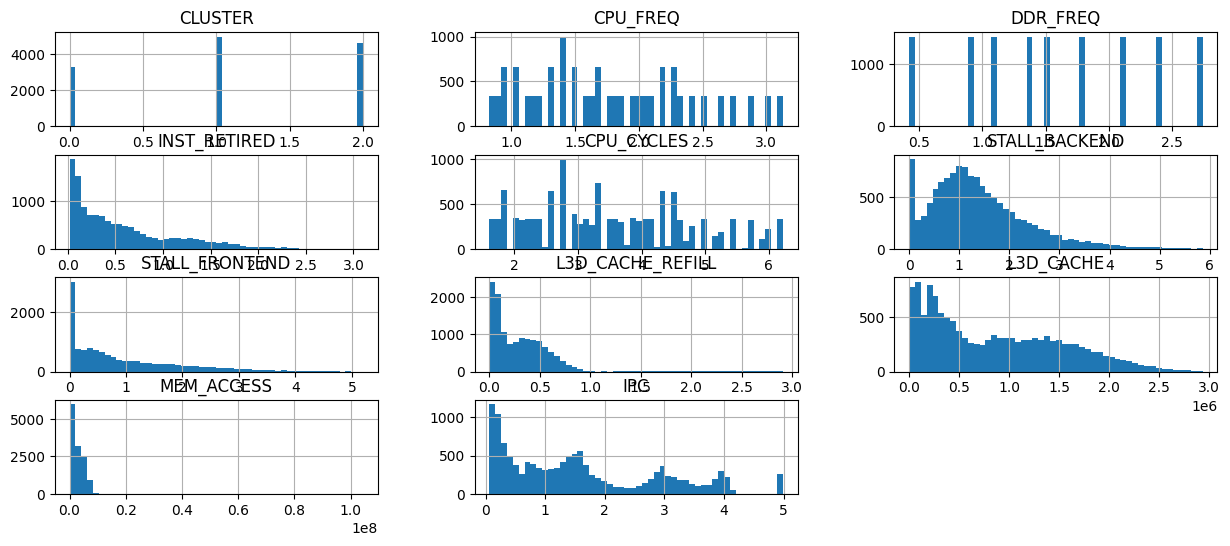

In [31]:
df.hist(bins=50, figsize=(15, 6))

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from catboost import CatBoostClassifier, Pool

train, tests= train_test_split(df, test_size=0.2)
val, test = train_test_split(tests, test_size=0.5)
print(len(train), len(val), len(test))

# train = df

target_col = 'IPC'
train_x, train_y = train.drop(target_col, axis=1), train[target_col]
val_x, val_y = test.drop(target_col, axis=1), val[target_col]
test_x, test_y = test.drop(target_col, axis=1), test[target_col]


mean_INST_RETIRED = df_test_B1['INST_RETIRED'].mean()
mean_CPU_CYCLES = df_test_B1['CPU_CYCLES'].mean()
mean_STALL_BACKEND = df_test_B1['STALL_BACKEND'].mean()
mean_STALL_FRONTEND = df_test_B1['STALL_FRONTEND'].mean()
mean_L3D_CACHE_REFILL = df_test_B1['L3D_CACHE_REFILL'].mean()
mean_L3D_CACHE = df_test_B1['L3D_CACHE'].mean()
mean_MEM_ACCESS = df_test_B1['MEM_ACCESS'].mean()

arr_CLUSTER = []
arr_CPU_FREQ = []
arr_DDR_FREQ = []
for i in datas:
    if i not in datas_test:
        CLUSTER = i[0]
        CPU_FREQ = i[1]
        DDR_FREQ = i[2]
        arr_CLUSTER.append(CLUSTER)
        arr_CPU_FREQ.append(CPU_FREQ)
        arr_DDR_FREQ.append(DDR_FREQ)

sobirau = pd.DataFrame()
sobirau['CLUSTER'] = arr_CLUSTER
sobirau['CPU_FREQ'] = arr_CPU_FREQ
sobirau['DDR_FREQ'] = arr_DDR_FREQ

sex = len(arr_CLUSTER)
sobirau['INST_RETIRED'] = [mean_INST_RETIRED] * sex
sobirau['CPU_CYCLES'] = [mean_CPU_CYCLES] * sex
sobirau['STALL_BACKEND'] = [mean_STALL_BACKEND] * sex
sobirau['STALL_FRONTEND'] = [mean_STALL_FRONTEND] * sex
sobirau['L3D_CACHE_REFILL'] = [mean_L3D_CACHE_REFILL] * sex
sobirau['L3D_CACHE'] = [mean_L3D_CACHE] * sex
sobirau['MEM_ACCESS'] = [mean_MEM_ACCESS] * sex
        

model = CatBoostClassifier()
model.fit(train_x, train_y)

test_y = model.predict(sobirau)

# mean_absolute_percentage_error(test_y, pred)
# print(sobirau.head())
# sobirau.info()е
test_y

out = sobirau
out['IPC'] = test_y
out.info()


10389 1299 1299
Learning rate set to 0.08916
0:	learn: 9.2045743	total: 37m 11s	remaining: 25d 19h 15m 44s
1:	learn: 9.1773131	total: 1h 1m 27s	remaining: 21d 7h 3m 55s
2:	learn: 9.1506352	total: 1h 38m 43s	remaining: 22d 18h 52m 3s


In [62]:
cols_send = [
    'CLUSTER',
    'CPU_FREQ',
    'DDR_FREQ',
    'IPC'
]

df_send_B1 = out[cols_send]


print(df_send_B1.info())
df_send_B1.head()

df_send_B1.to_csv('./B1_first_simple1.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CLUSTER   245 non-null    int64  
 1   CPU_FREQ  245 non-null    int64  
 2   DDR_FREQ  245 non-null    int64  
 3   IPC       245 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 7.8 KB
None


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from catboost import CatBoostClassifier, Pool

train, tests= train_test_split(df, test_size=0.2)
val, test = train_test_split(tests, test_size=0.5)
print(len(train), len(val), len(test))

# train = df

target_col = 'IPC'
train_x, train_y = train.drop(target_col, axis=1), train[target_col]
val_x, val_y = test.drop(target_col, axis=1), val[target_col]
test_x, test_y = test.drop(target_col, axis=1), test[target_col]


mean_INST_RETIRED = df_test_B1['INST_RETIRED'].mean()
mean_CPU_CYCLES = df_test_B1['CPU_CYCLES'].mean()
mean_STALL_BACKEND = df_test_B1['STALL_BACKEND'].mean()
mean_STALL_FRONTEND = df_test_B1['STALL_FRONTEND'].mean()
mean_L3D_CACHE_REFILL = df_test_B1['L3D_CACHE_REFILL'].mean()
mean_L3D_CACHE = df_test_B1['L3D_CACHE'].mean()
mean_MEM_ACCESS = df_test_B1['MEM_ACCESS'].mean()

arr_CLUSTER = []
arr_CPU_FREQ = []
arr_DDR_FREQ = []
for i in datas:
    if i not in datas_test:
        CLUSTER = i[0]
        CPU_FREQ = i[1]
        DDR_FREQ = i[2]
        arr_CLUSTER.append(CLUSTER)
        arr_CPU_FREQ.append(CPU_FREQ)
        arr_DDR_FREQ.append(DDR_FREQ)

sobirau = pd.DataFrame()
sobirau['CLUSTER'] = arr_CLUSTER
sobirau['CPU_FREQ'] = arr_CPU_FREQ
sobirau['DDR_FREQ'] = arr_DDR_FREQ

sex = len(arr_CLUSTER)
sobirau['INST_RETIRED'] = [mean_INST_RETIRED] * sex
sobirau['CPU_CYCLES'] = [mean_CPU_CYCLES] * sex
sobirau['STALL_BACKEND'] = [mean_STALL_BACKEND] * sex
sobirau['STALL_FRONTEND'] = [mean_STALL_FRONTEND] * sex
sobirau['L3D_CACHE_REFILL'] = [mean_L3D_CACHE_REFILL] * sex
sobirau['L3D_CACHE'] = [mean_L3D_CACHE] * sex
sobirau['MEM_ACCESS'] = [mean_MEM_ACCESS] * sex
        

model = CatBoostClassifier()
model.fit(train_x, train_y)

test_y = model.predict(sobirau)

# mean_absolute_percentage_error(test_y, pred)
# print(sobirau.head())
# sobirau.info()е
test_y

out = sobirau
out['IPC'] = test_y
out.info()
